# Introduction to Network Analysis
In this tutorial, we're going to learn about network analysis. 

We'll be building on concepts from Scott Weingart's "Demystifying Networks." As Weingart Noted

Before you get started, make sure to run the cells below. 

### Install NetworkX

In [4]:
!pip install networkx

### Import Libraries
Click and run the cell below.

In [1]:
import networkx
import pandas as pd
pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## Test Case: *Game of Thrones* Network Data
The network data that we’re going to use in this lesson was created by Andrew Beveridge and Jie Shan as part of their paper, [“Network of Thrones.”](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)

These researchers calculated how many times each Game of Thrones character appeared within **15 words** of another character in *A Storm of Swords*, the third book in the series.

> *CHECK-IN*: Discuss with your group: 
> - How are these research defining "relationship" between characters?  
> - What might this method potentially miss or leave out?

### Create a Pandas dataframe from our CSV

In [2]:
got_df = pd.read_csv('../_datasets/got-edges.csv')

Let's take a look at what our dataset contains. 

In [3]:
got_df

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
5,Aerys,Tywin,8
6,Alliser,Mance,5
7,Amory,Oberyn,5
8,Arya,Anguy,11
9,Arya,Beric,23


Notice that network data here is formatted:

- We have three columns, a "Source" column, a "Target" column, and a "Weight" column. 
- Beveridge and Shan's paper tells us that "Source" and column names a character, and the "Target" column names another character (ie the 'Target') who appears within 15 words of that character
- The values in the "Weight" column represent the number of times that character pair appear within 15 words of each other.

We could call our two columns anything we liked, eg "Characters1" and "Characters2", but "Source" and target help us to make clear the direction of the relationship. 

To make a basic network diagram, you really only need two columns, a "Source" and a "Target". Additional columns, like "Weight" can add more information to your diagram, but are not necessary.


## Use NetworkX to create a network from a pandas dataframe
We're going to create a network called "G" from our got_df dataframe.

In [4]:
G = networkx.from_pandas_edgelist(got_df, 'Source', 'Target', 'Weight')

## Output a Network File

In [5]:
networkx.write_graphml(G, 'GOT-network.graphml')

## Draw a Simple Network
We're going us use the network we created, "G" to draw a simple network diagram.

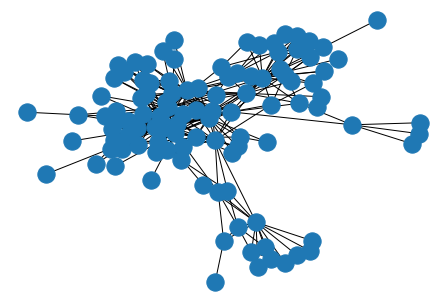

In [6]:
networkx.draw(G)

Yikes! This looks messy and hard to read. Let's try and make our visualization a little more legible.

### Customizing a Network Diagram

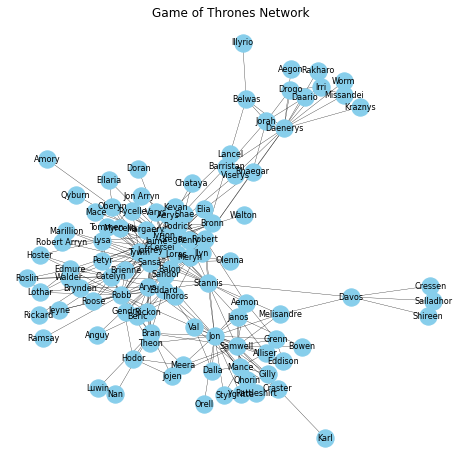

In [7]:
# Make the size of our plotting area larger
plt.figure(figsize=(8,8))

# Set the axis 
ax = plt.gca()

# Define the title
ax.set_title('Game of Thrones Network')

# Use networkx to generate our network diagram.
# We're also going to turn the labels on, set the node color and font size
networkx.draw(G, with_labels=True, node_size=300, node_color='skyblue', width=.3, font_size=8)
_ = ax.axis('off')

## Your Turn!

1. With your group, try and modfiy some of the visualization variables, like `node_size`, `node_color`, line with, or font size

## Calculate degree

A key peice in network analyis  is calculating something called "degree" -- this is the number of connections that each node has. 

Let's find out which character has the most connections to other characters, according to this dataset.

In [8]:
networkx.degree(G)

DegreeView({'Aemon': 5, 'Grenn': 4, 'Samwell': 15, 'Aerys': 4, 'Jaime': 24, 'Robert': 18, 'Tyrion': 36, 'Tywin': 22, 'Alliser': 3, 'Mance': 12, 'Amory': 1, 'Oberyn': 7, 'Arya': 19, 'Anguy': 2, 'Beric': 6, 'Bran': 14, 'Brynden': 8, 'Cersei': 20, 'Gendry': 4, 'Gregor': 12, 'Joffrey': 18, 'Jon': 26, 'Rickon': 6, 'Roose': 4, 'Sandor': 13, 'Thoros': 5, 'Balon': 6, 'Loras': 9, 'Belwas': 4, 'Barristan': 6, 'Illyrio': 1, 'Hodor': 4, 'Jojen': 4, 'Luwin': 2, 'Meera': 5, 'Nan': 2, 'Theon': 4, 'Brienne': 7, 'Bronn': 4, 'Podrick': 5, 'Lothar': 5, 'Walder': 8, 'Catelyn': 18, 'Edmure': 8, 'Hoster': 3, 'Jeyne': 2, 'Lysa': 10, 'Petyr': 7, 'Robb': 25, 'Roslin': 4, 'Sansa': 26, 'Stannis': 14, 'Elia': 5, 'Ilyn': 6, 'Meryn': 7, 'Pycelle': 4, 'Shae': 5, 'Varys': 7, 'Craster': 5, 'Karl': 1, 'Daario': 4, 'Drogo': 4, 'Irri': 4, 'Daenerys': 14, 'Aegon': 1, 'Jorah': 6, 'Kraznys': 1, 'Missandei': 2, 'Rakharo': 1, 'Rhaegar': 6, 'Viserys': 3, 'Worm': 1, 'Davos': 5, 'Cressen': 1, 'Salladhor': 1, 'Eddard': 12, 'Eddis

We're going to make this list of degree values a dictionary, then add it as a network “attribute” with `networkx.set_node_attributes()`. Think about a node attribute as like an additional column in a dataframe. We'll be able to use this information later in visualizing our netowrk diagram.

In [9]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Let's make a Pandas dataframe from the degree data that we just created, G.nodes(data='degree'), then sort from highest to lowest.

Click and run the two cells below.

In [10]:
degrees_df =  pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])

In [11]:
degrees_df = degrees_df.sort_values(by='degree', ascending=False)
degrees_df

,node,degree
6,Tyrion,36
21,Jon,26
50,Sansa,26
48,Robb,25
4,Jaime,24
7,Tywin,22
17,Cersei,20
12,Arya,19
42,Catelyn,18
5,Robert,18


### Visualizing degree data
Let's make a simple bar plot of the top 10 nodes (ie characters in this dataset) with the highest degree value:

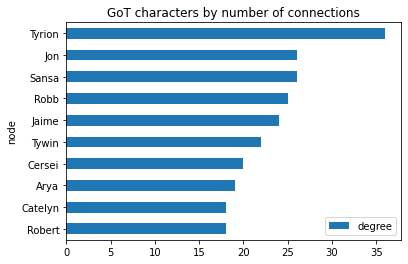

In [12]:
num_nodes_to_inspect = 10
degrees_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh', title="GoT characters by number of connections").invert_yaxis()

## Calculate Degree (with weighted edges)

But remember that we also have other information––the "Weight" column, or the number of times characters appeared near each other. How does our graph of who has the most connections change if we factor in weight?

In [13]:
networkx.degree(G, weight='Weight')

DegreeView({'Aemon': 74, 'Grenn': 81, 'Samwell': 282, 'Aerys': 37, 'Jaime': 372, 'Robert': 128, 'Tyrion': 551, 'Tywin': 204, 'Alliser': 29, 'Mance': 160, 'Amory': 5, 'Oberyn': 76, 'Arya': 269, 'Anguy': 15, 'Beric': 75, 'Bran': 344, 'Brynden': 55, 'Cersei': 226, 'Gendry': 59, 'Gregor': 117, 'Joffrey': 255, 'Jon': 442, 'Rickon': 81, 'Roose': 17, 'Sandor': 137, 'Thoros': 60, 'Balon': 29, 'Loras': 76, 'Belwas': 67, 'Barristan': 63, 'Illyrio': 10, 'Hodor': 177, 'Jojen': 125, 'Luwin': 8, 'Meera': 139, 'Nan': 18, 'Theon': 38, 'Brienne': 122, 'Bronn': 59, 'Podrick': 64, 'Lothar': 34, 'Walder': 87, 'Catelyn': 184, 'Edmure': 98, 'Hoster': 24, 'Jeyne': 28, 'Lysa': 108, 'Petyr': 89, 'Robb': 342, 'Roslin': 32, 'Sansa': 383, 'Stannis': 146, 'Elia': 29, 'Ilyn': 32, 'Meryn': 47, 'Pycelle': 24, 'Shae': 45, 'Varys': 49, 'Craster': 75, 'Karl': 6, 'Daario': 30, 'Drogo': 35, 'Irri': 33, 'Daenerys': 232, 'Aegon': 8, 'Jorah': 89, 'Kraznys': 10, 'Missandei': 30, 'Rakharo': 7, 'Rhaegar': 42, 'Viserys': 19, 'Wo

Just like we did above, we're going to mke the weighted degree values a dictionary, then add it as a network “attribute” with `networkx.set_node_attributes()`

In [14]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degrees', values=weighted_degrees)

Now let's make a Pandas dataframe from the degree data G.nodes(data='weighted_degree'), then sort from highest to lowest

In [15]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degrees'), columns=['node', 'weighted_degrees'])

In [16]:
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degrees', ascending=False)
weighted_degree_df

,node,weighted_degrees
6,Tyrion,551
21,Jon,442
50,Sansa,383
4,Jaime,372
15,Bran,344
48,Robb,342
2,Samwell,282
12,Arya,269
20,Joffrey,255
63,Daenerys,232


### Visualizing (weighted) degree data
Plota simple bar plot of the top 10 nodes the nodes with the highest **weighted** degree values (i.e not just the number of characters they are connected to, but the number of times they appear within 15 words of another character)

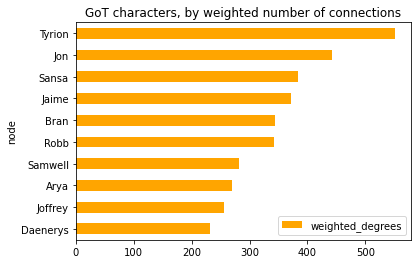

In [17]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degrees', color='orange', kind='barh', \
                                               title="GoT characters, by weighted number of connections").invert_yaxis()

## Calculate Betweenness Centrality

We can also measure other metrics, like "betweenness centrality". This is the meausre of the number of other nodes that a given node is connected to.

In [18]:
networkx.betweenness_centrality(G)

{'Aemon': 0.004622508177397137,
 'Grenn': 5.989817310572027e-05,
 'Samwell': 0.03227262859511145,
 'Aerys': 0.0,
 'Jaime': 0.09994344156136246,
 'Robert': 0.2094523840293194,
 'Tyrion': 0.19791284320277353,
 'Tywin': 0.06553840423231058,
 'Alliser': 0.0,
 'Mance': 0.007275961371756524,
 'Amory': 0.0,
 'Oberyn': 0.01958014232946847,
 'Arya': 0.07960711308183888,
 'Anguy': 0.0,
 'Beric': 0.0006091214266627511,
 'Bran': 0.06301659941786954,
 'Brynden': 0.004727134574764742,
 'Cersei': 0.02674643287824232,
 'Gendry': 0.0,
 'Gregor': 0.005879915417737236,
 'Joffrey': 0.025434099443917696,
 'Jon': 0.22996466368473173,
 'Rickon': 0.0007626320968639029,
 'Roose': 0.0002629599012559427,
 'Sandor': 0.014162278987154626,
 'Thoros': 0.0019261823273239152,
 'Balon': 0.0006281164805527878,
 'Loras': 0.003780752291533962,
 'Belwas': 0.018867924528301886,
 'Barristan': 0.04011407489067884,
 'Illyrio': 0.0,
 'Hodor': 0.0021937273446681065,
 'Jojen': 0.0004064518889316733,
 'Luwin': 0.0,
 'Meera': 0.001

In [19]:
betweenness_centrality = networkx.betweenness_centrality(G)

Just like we did with degree, we're going to add these betweennes centrality metrics to our network as a node attribute

In [20]:
# Add betweenness_centrality as an atribute to our network object
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

In [21]:
# Create a dataframe that is 
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
21,Jon,0.229965
5,Robert,0.209452
6,Tyrion,0.197913
63,Daenerys,0.157203
48,Robb,0.126964
50,Sansa,0.126720
51,Stannis,0.102700
4,Jaime,0.099943
12,Arya,0.079607
7,Tywin,0.065538


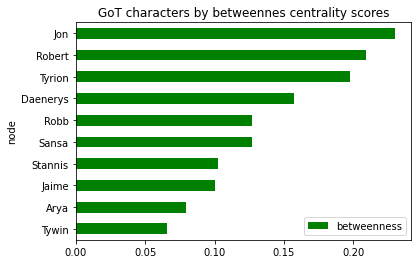

In [22]:
# Now, plot the top 10 nodes, by their betweeness centrality scores
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh', \
                                           title="GoT characters by betweennes centrality scores").invert_yaxis()

## Communities

We can use network analysis metrics to investigate who forms distinct communities within this network?

In [23]:
## import our community detection algorithm
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [24]:
communities = community.greedy_modularity_communities(G)

What the `community.greedy_modularity_communities()` operation does is sort the nodes in our netowrk by their **"modularity"** -- Modularity, "is one measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities)." (See ["Modularity"](https://en.wikipedia.org/wiki/Modularity_(networks))

Let's look at the communities we detected: 

In [25]:
communities

[frozenset({'Aerys',
            'Amory',
            'Balon',
            'Bronn',
            'Chataya',
            'Doran',
            'Elia',
            'Ellaria',
            'Gregor',
            'Ilyn',
            'Jaime',
            'Joffrey',
            'Kevan',
            'Lancel',
            'Loras',
            'Mace',
            'Margaery',
            'Meryn',
            'Myrcella',
            'Oberyn',
            'Olenna',
            'Podrick',
            'Pycelle',
            'Qyburn',
            'Renly',
            'Sandor',
            'Shae',
            'Tommen',
            'Tyrion',
            'Tywin',
            'Varys',
            'Walton'}),
 frozenset({'Aemon',
            'Alliser',
            'Bowen',
            'Craster',
            'Cressen',
            'Dalla',
            'Davos',
            'Eddison',
            'Gilly',
            'Grenn',
            'Hodor',
            'Janos',
            'Jojen',
            'Jon',
     

Let's make a dictionary  by looping through the communities and, for each member of the community, adding their community number.

In [26]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [27]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

In [28]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

communities_df


,node,modularity_class
25,Thoros,4
18,Gendry,4
14,Beric,4
13,Anguy,4
28,Belwas,3
94,Jon Arryn,3
65,Jorah,3
67,Missandei,3
71,Worm,3
70,Viserys,3


**Look at just the characters in modularity class 4**:

In [29]:
communities_df[communities_df['modularity_class'] == 4]

,node,modularity_class
25,Thoros,4
18,Gendry,4
14,Beric,4
13,Anguy,4


**Look at just the characters in modularity class 3:**


In [30]:
communities_df[communities_df['modularity_class'] == 3]

,node,modularity_class
28,Belwas,3
94,Jon Arryn,3
65,Jorah,3
67,Missandei,3
71,Worm,3
70,Viserys,3
29,Barristan,3
30,Illyrio,3
69,Rhaegar,3
68,Rakharo,3


### Make a simple plot of communities ("modularity classes") in our network

In [31]:
## Import plotting library seaborn
import seaborn as sns

First, let's plot a random sample from our communities dataframe:

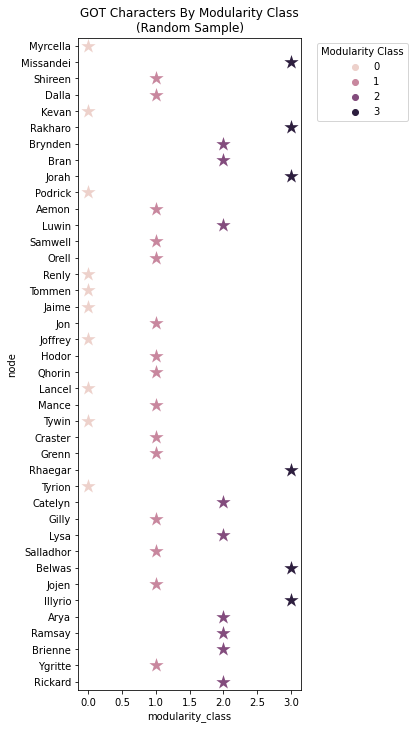

In [32]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()

#### Plot the communities in our communities dataframe:

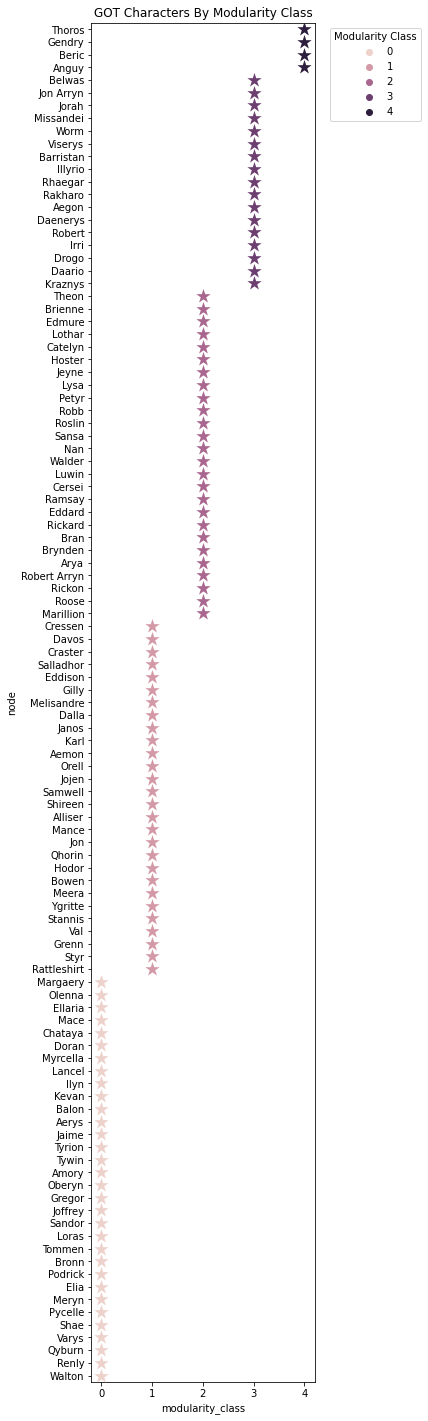

In [33]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)
# Add a legend
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class")
plt.show()

## Create a Pandas Dataframe with all Network Metrics

We've now generated a lot of statstical data about each of the nodes in our network:

- weighted degrees
- betweenness
- modularity class

Take a look:

In [34]:
dict(G.nodes(data=True))

{'Aemon': {'degree': 5,
  'weighted_degrees': 74,
  'betweenness': 0.004622508177397137,
  'modularity_class': 1},
 'Grenn': {'degree': 4,
  'weighted_degrees': 81,
  'betweenness': 5.989817310572027e-05,
  'modularity_class': 1},
 'Samwell': {'degree': 15,
  'weighted_degrees': 282,
  'betweenness': 0.03227262859511145,
  'modularity_class': 1},
 'Aerys': {'degree': 4,
  'weighted_degrees': 37,
  'betweenness': 0.0,
  'modularity_class': 0},
 'Jaime': {'degree': 24,
  'weighted_degrees': 372,
  'betweenness': 0.09994344156136246,
  'modularity_class': 0},
 'Robert': {'degree': 18,
  'weighted_degrees': 128,
  'betweenness': 0.2094523840293194,
  'modularity_class': 3},
 'Tyrion': {'degree': 36,
  'weighted_degrees': 551,
  'betweenness': 0.19791284320277353,
  'modularity_class': 0},
 'Tywin': {'degree': 22,
  'weighted_degrees': 204,
  'betweenness': 0.06553840423231058,
  'modularity_class': 0},
 'Alliser': {'degree': 3,
  'weighted_degrees': 29,
  'betweenness': 0.0,
  'modularity_

Let's make a pandas dataframe called "nodes_df" with all of this information from our nodes dictionary:

In [35]:
## Transpose it
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,weighted_degrees,betweenness,modularity_class
Aemon,5.0,74.0,0.004623,1.0
Grenn,4.0,81.0,0.000060,1.0
Samwell,15.0,282.0,0.032273,1.0
Aerys,4.0,37.0,0.000000,0.0
Jaime,24.0,372.0,0.099943,0.0
Robert,18.0,128.0,0.209452,3.0
Tyrion,36.0,551.0,0.197913,0.0
Tywin,22.0,204.0,0.065538,0.0
Alliser,3.0,29.0,0.000000,1.0
Mance,12.0,160.0,0.007276,1.0


In [36]:
# Sort by betweenness
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degrees,betweenness,modularity_class
Jon,26.0,442.0,0.229965,1.0
Robert,18.0,128.0,0.209452,3.0
Tyrion,36.0,551.0,0.197913,0.0
Daenerys,14.0,232.0,0.157203,3.0
Robb,25.0,342.0,0.126964,2.0
Sansa,26.0,383.0,0.126720,2.0
Stannis,14.0,146.0,0.102700,1.0
Jaime,24.0,372.0,0.099943,0.0
Arya,19.0,269.0,0.079607,2.0
Tywin,22.0,204.0,0.065538,0.0


---

## Making an Interactive Network Visualization

This next section notebook includes with code for a basic network visualization then progressively demonstrates how to add more information and functionality, such as:

-  [sizing and coloring nodes by degree](#Make-an-Interactive-Network-with-Nodes-Sized-and-Colored-By-Attribute-(Degree))
- [sizing and coloring nodes by modularity class](#Make-an-Interactive-Network-with-Nodes-Colored-By-Attribute-(Community))
- [adding responsive highlighting when hovering over nodes and edges](#Make-an-Interactive-Network-With-Labels-and-Responsive-Highlighting)
- [adding node labels](#Make-an-Interactive-Network-With-Labels-and-Responsive-Highlighting)


Don't panic if you see a wall of code––much of the code is the same for each visualization, with some slight tweaks. I've included it in full so that you know what is required to produce each individual visualization, though in theory many of the repeated code snippets could be run just once to procue each of the visualizations.

### Import Libraries

In [37]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np

### Install and Import Bokeh

In [38]:
# If you're running this notebook on your local machine, make sure to uncomment the line below and run this cell:
#!pip install bokeh

In [39]:
from bokeh.io import output_notebook, show, save

Tell Bokeh to load to our notebook

In [42]:
output_notebook()

Loading BokehJS ...

### Let's look at our dataframe:

In [43]:
got_df

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
5,Aerys,Tywin,8
6,Alliser,Mance,5
7,Amory,Oberyn,5
8,Arya,Anguy,11
9,Arya,Beric,23


### Make a nework from our dataframe:
We make a network with `networkx.from_pandas_edgelist()`:


In [44]:
G = networkx.from_pandas_edgelist(got_df, 'Source', 'Target', 'Weight')

## Make a Basic Interactive Network Visualization

### Import modules

In [45]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [46]:
#Choose a title!
title = 'Game of Thrones Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue', )

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
# If we want to save the plot, uncomment the line below and run this cell. It will save this plot as an HTML file
#save(plot, filename=f"{title}.html")

## Make an Interactive Network with Nodes Sized and Colored By Attribute (Degree)

The code below shows how to size and color nodes by degree.

### Import Bokeh Color palettes

In [47]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap


### Calculate degree for each node and add as node attribute

In [48]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

### Slightly adjust degree so that the nodes with very small degrees are still visible

In [49]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [50]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Game of Thrones Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree")
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)

# If we want to save the plot, uncomment the line below and run this cell. It will save this plot as an HTML file
#save(plot, filename=f"{title}.html")

## Make an Interactive Network with Nodes Colored By Attribute (Community)
The code below shows how to size and color nodes by modularity class.

### Import Bokeh Color palettes and community module

In [51]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

### (Like above example) Calculate degree for each node and add as node attribute

In [52]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

### (Like above example) Slightly adjust degree so that the nodes with very small degrees are still visible

In [53]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

### Calculate Communities

In [54]:
communities = community.greedy_modularity_communities(G)

In [55]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]

In [56]:
# Add modularity class and color as attributes from the network above
networkx.set_node_attributes(G, modularity_class, 'modularity_class')
networkx.set_node_attributes(G, modularity_color, 'modularity_color')


In [57]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'
#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8
#Choose a title!
title = 'Game of Thrones Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset, tap", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)
# If we want to save the plot, uncomment the line below and run this cell. It will save this plot as an HTML file
#save(plot, filename=f"{title}.html")

## Make an Interactive Network With Labels and Responsive Highlighting
The code below shows how to create node labels and responsive highlighting when a user hovers over nodes or edges, which you can read more about in [Bokeh’s NetworkX Integration documentation](https://docs.bokeh.org/en/latest/docs/user_guide/graph.html?highlight=networks#interaction-policies)

### Import Bokeh Color palettes and community module

In [58]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

### (Like above example) Calculate degree for each node and add as node attribute

In [59]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

### (Like above example) Slightly adjust degree so that the nodes with very small degrees are still visible

In [60]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

### (like above example) Calculate Communities

In [61]:
communities = community.greedy_modularity_communities(G)

In [62]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]

In [63]:
# Add modularity class and color as attributes from the network above
networkx.set_node_attributes(G, modularity_class, 'modularity_class')
networkx.set_node_attributes(G, modularity_color, 'modularity_color')


In [64]:
#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Game of Thrones Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

    #Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)
# If we want to save the plot, uncomment the line below and run this cell. It will save this plot as an HTML file
#save(plot, filename=f"{title}.html")